# 국민건강영양조사 자료 중 구강검사데이터셋
---
출처 : https://knhanes.cdc.go.kr/knhanes/main.do
   

### 1. 구강검사(검진조사) 
 - 질병관리본부에서 수행중인 국민건강양영조사 중 구강검진조사 데이터이다
 - 매년 만 1세 이상을 대상으로 치아와 보철물 상태, 치주조직 상태, 칫솔질 실천을 포함한 구강건강관련 행태의 자료를 수집하고 있다.
 - 구강검진은 구강설문조사, 치아상태, 치주조직검사로 이루어져 있다. 
 - 공중보건치과의를 선발하여 교육훈련과정을 이수한 조사원이 구강검진을 수행한다. 

<center>![구강검진](구강검진과정.png)</center>
<출처: 국민건강영양조사 조사수행지침>

#### 1.1 치아상태
----
각 치아번호마다 아래의 값으로 코딩한다.

0. 건전치면
1. 우식치면
3. 우식경험처치치면
4. 우식경험상실치면
5. 우식비경험상실치면
6. 전색치면
7. 우식비경험처치치면
8. 미맹출치면
9. 기록불가치면
![구강검진](구강검진.png) 
<출처: 국민건강영양조사 조사수행지침>

#### 1.2. 치주질환
---
 - 치주질환(또는 치주병, 치주염)은 세균에 의해 발생되는 치아주위 잇몸의 염증성 질환으로 치주인대와 잇몸뼈의 파괴를 일으킨다.
 - 
 
![치주염](periodontitis.png)
<출처: 대한치주과학회, http://www.kperio.org/patient/disease.php>


![치주탐침](cpi_probe.png)
<출처: 국민건강영양조사 조사수행지침>

 - 치주탐침을 잇몸에 찔러서 잇몸뼈의 위치까지 얼마나 깊이 들어가는지와 출혈을 관찰한다.
![치주낭검사](치주낭검사.png)
<출처: 대한치주과학회, http://www.kperio.org/patient/disease.php>


 - 치주질환은 국민건강영양조사 구강건강실태 조사방법에 따라 지역사회치주지수(Community Periodontal Index, CPI)를 이용하여 치과의사가 시진과 촉진으로 검진한다.
 - 만 19세 이상의 대상자의 구강 내 6분악 중 검사표준 치아 상·하악의 좌·우측 제 1,2 대구치, 상악 우측 중절치, 하악 좌측 중절치를 치주 탐침 시 치주낭 깊이가 4 mm 이상 보유자를 치주질환자로 분류한다
 - 데이터셋의 치주조직상태 변수인 O_CPI_UR, O_CPI_UM, O_CPI_UL, O_CPI_LL으로 산출한 지표이다.

## 신경망 학습 목적
---
    치주질환을 검사하기 위한 치주낭 측정기(periodonal probe)를 치아에 찌르게 되면 출혈(이상이 있을 경우)과 통증이 유발된다. 또한 모든 치아를 검사해야 하는데 이는 시간소모가 많고 힘든 작업으로 알려져 있다. 주기적인 엑스레이 검사와 치주낭 측정 검사를 해야 사전에 치료가 가능하지만 주기적으로 하기 힘든게 현실이다. 치아 상태를 이용하여 치주질환을 분류하고자 한다. 

In [1]:
import pandas as pd

dt_raw = pd.read_sas("hn_dental_adj.sas7bdat").dropna() 

In [2]:
dt_raw.head()

,ID,sex,age,O_DIP,O_55B,O_55D,O_55O,O_55M,O_55L,O_54B,...,O_TN73,O_TN74,O_TN75,O_CPI_UR,O_CPI_UM,O_CPI_UL,O_CPI_LR,O_CPI_LM,O_CPI_LL,NO_CPI_34
6224,b'A851913501',1.0,72.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0
6226,b'A851915601',2.0,81.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
6227,b'A851917101',1.0,62.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6228,b'A851917102',2.0,56.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,2.0,0.0
6229,b'A851917701',1.0,55.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#자료가 제대로 읽어들여졌는지 확인한다.
print(dt_raw.shape)

(20453, 299)


In [4]:
# 변수명 확인하기
dt_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20453 entries, 6224 to 29014
Columns: 299 entries, ID to NO_CPI_34
dtypes: float64(298), object(1)
memory usage: 46.8+ MB


In [5]:
# 자료를 복사하여 사용하고 원자료는 조작하지 않는다
dt = dt_raw.copy()

In [6]:
#연령을 범위로 구분하기
labels = ["{0} - {1}".format(i, i + 10) for i in range(19, 80, 10)]
dt['age']=dt.age.astype('int64')
dt['age'] = pd.cut(dt.age, range(19, 90, 10), right=False, labels=labels)

In [7]:
# 불필요한 변수 삭제
dt = dt.drop(columns = ['ID','O_CPI_UR','O_CPI_UM','O_CPI_UL','O_CPI_LL'], axis = 1)

In [8]:
dt.shape

(20453, 294)

In [9]:
dt.head()

,sex,age,O_DIP,O_55B,O_55D,O_55O,O_55M,O_55L,O_54B,O_54D,...,O_TN82,O_TN81,O_TN71,O_TN72,O_TN73,O_TN74,O_TN75,O_CPI_LR,O_CPI_LM,NO_CPI_34
6224,1.0,69 - 79,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6226,2.0,79 - 89,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
6227,1.0,59 - 69,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6228,2.0,49 - 59,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
6229,1.0,49 - 59,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# 치주질환 빈도 확인
import matplotlib.pyplot as plt
dt['NO_CPI_34'].value_counts().plot(kind='bar')
plt.show()

<Figure size 640x480 with 1 Axes>

In [12]:
#범주형 변수를 카테고리 속성으로 변경
for i in dt.columns:
    dt[i]=pd.Categorical(dt[i])

In [13]:
# 변경되었는지 확인
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20453 entries, 6224 to 29014
Columns: 294 entries, sex to NO_CPI_34
dtypes: category(294)
memory usage: 6.0 MB


In [14]:
import numpy as np

In [15]:
##변경후 데이터 확인
dt.head()

,sex,age,O_DIP,O_55B,O_55D,O_55O,O_55M,O_55L,O_54B,O_54D,...,O_TN82,O_TN81,O_TN71,O_TN72,O_TN73,O_TN74,O_TN75,O_CPI_LR,O_CPI_LM,NO_CPI_34
6224,1.0,69 - 79,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6226,2.0,79 - 89,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
6227,1.0,59 - 69,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6228,2.0,49 - 59,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
6229,1.0,49 - 59,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 타겟변수 생성
---


In [16]:
# 요약 확인
dt.describe()

,sex,age,O_DIP,O_55B,O_55D,O_55O,O_55M,O_55L,O_54B,O_54D,...,O_TN82,O_TN81,O_TN71,O_TN72,O_TN73,O_TN74,O_TN75,O_CPI_LR,O_CPI_LM,NO_CPI_34
count,20453.0,20451,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,...,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0
unique,2.0,7,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,6.0,2.0
top,2.0,49 - 59,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
freq,11796.0,4064,14251.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,...,20452.0,20452.0,20452.0,20452.0,20452.0,20452.0,20452.0,12495.0,10773.0,14273.0


In [17]:
dt['NO_CPI_34'].describe()

count     20453.0
unique        2.0
top           0.0
freq      14273.0
Name: NO_CPI_34, dtype: float64

In [18]:
print(dt['NO_CPI_34'].value_counts())

0.0    14273
1.0     6180
Name: NO_CPI_34, dtype: int64


In [19]:
dt.shape

(20453, 294)

In [20]:
# 피쳐와 타겟을 분리한다.

periodontitis = dt[['NO_CPI_34']]
features_dt = dt.drop(columns = ['NO_CPI_34'], axis = 1)

In [21]:
#disease_dt = disease_dt.np.astype()

In [22]:
#disease_dt = pd.get_dummies(disease_dt.DM)

In [23]:
#disease_dt=disease_dt.rename({0:'Normal', 1:'Diabetes'},axis='columns')
periodontitis.head()

,NO_CPI_34
6224,1.0
6226,0.0
6227,0.0
6228,0.0
6229,0.0


In [24]:
features_dt_sc =  pd.get_dummies(features_dt)

In [25]:
# Train데이터와 Test를 나눈다.
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_dt_sc, periodontitis, random_state=20181121)

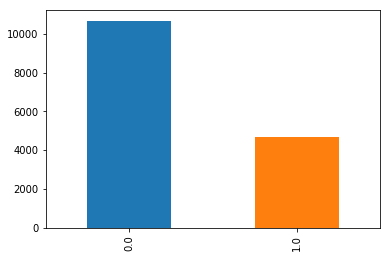

In [26]:
import matplotlib.pyplot as plt
y_train['NO_CPI_34'].value_counts().plot(kind='bar')
plt.show()

### 신경망 모형 만들기 

In [27]:
#target의 척도를 지정한다. 중요하다.
target_cat = pd.api.types.CategoricalDtype(categories=range(2), ordered=False)
print(target_cat.categories)

RangeIndex(start=0, stop=2, step=1)


In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15339, 1579)
(5114, 1579)
(15339, 1)
(5114, 1)


In [29]:
#y_train = y_train.astype(target_cat)
#y_test = y_test.astype(target_cat)
#print(y_train.dtype)
#print(y_test.dtype)

In [30]:
##nb = number
nb_tr_examples, nb_inputs = X_train.shape
#hidden layer
nb_units_hl_1 = 50
#output number를 타겟의 행과열의수 1
nb_outputs = y_train.shape[1]
print(nb_tr_examples, nb_inputs, nb_units_hl_1, nb_outputs)

15339 1579 50 1


In [31]:
y_train.head()

,NO_CPI_34
15829,0.0
26465,0.0
24547,0.0
18107,0.0
8612,0.0


In [32]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras import metrics

from keras.optimizers import SGD, Adam, RMSprop

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [33]:
import numpy
seed = 20181121
numpy. random.seed(seed)

# model parameters를 매개변수로 받아 모형을 동적으로 생성한다. 

def create_model(optimizer, lr):
    
    model = Sequential()
    hl_1 = Dense(nb_units_hl_1, input_dim = nb_inputs)
    model.add(hl_1)
    hl_1_act = Activation('sigmoid')
    model.add(hl_1_act)
    ol = Dense(nb_outputs)
    model.add(ol)
    ol_act = Activation('sigmoid')
    model.add(ol_act)
    
    if optimizer == 'sgd':
        optim = SGD(lr=lr)
    if optimizer == 'rmsprop':
        optim = RMSprop(lr=lr)
    if optimizer == 'adam':
        optim = Adam(lr=lr)
    
    model.compile(optimizer=optim, loss='binary_crossentropy', metrics=["accuracy"])
    
    return model

In [34]:
model = KerasClassifier(build_fn=create_model)

In [37]:
# 모형을 컴파일할 때와 컴파일된 모형을 훈력(fit)할 때 전달한 매개변수에
# 전달할 값들을 사전으로 만든다.
# 전달할 매개변수의 이름과 개수가 다른 경우에는 list of dictionaries를 만든다. 
optimizers = ['sgd','adam','rmsprop']

lr = [0.001, 0.01]

epochs = [5, 10, 30]
batches = [20, 30, 50]

param_grid = dict(optimizer = optimizers, lr=lr, epochs=epochs, batch_size=batches)

#교차 검증을 위해 k-fold 객체를 생성한다. 
from sklearn.model_selection import StratifiedKFold 
kfold = StratifiedKFold(n_splits=3, random_state=20181121)

In [38]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=['accuracy'], refit="accuracy", return_train_score=True, cv=kfold)

# KerasClassifier 내에서 target을 one-hot encoding하므로
# Keras NN model을 sklearn을 연결할 때 one-hot encoding 하지 않은 target을 사용한다. 

grid_result = grid.fit(X_train, y_train)

Epoch 1/5
10225/10225 [==============================] - 1s 64us/step - loss: 0.6246 - acc: 0.6657
Epoch 2/5
10225/10225 [==============================] - 1s 57us/step - loss: 0.6017 - acc: 0.6956
Epoch 3/5
10225/10225 [==============================] - 1s 56us/step - loss: 0.5969 - acc: 0.6956
Epoch 4/5
10225/10225 [==============================] - 1s 54us/step - loss: 0.5929 - acc: 0.6961
Epoch 5/5
10225/10225 [==============================] - 1s 57us/step - loss: 0.5893 - acc: 0.6951
Epoch 1/5
10226/10226 [==============================] - 1s 52us/step - loss: 0.6133 - acc: 0.6956
Epoch 2/5
10226/10226 [==============================] - 1s 53us/step - loss: 0.6030 - acc: 0.6956
Epoch 3/5
10226/10226 [==============================] - 0s 49us/step - loss: 0.5988 - acc: 0.6956
Epoch 4/5
10226/10226 [==============================] - 1s 58us/step - loss: 0.5951 - acc: 0.6956
Epoch 5/5
10226/10226 [==============================] - 1s 57us/step - loss: 0.5918 - acc: 0.6955
Epoch 1/5


10226/10226 [==============================] - 1s 93us/step - loss: 0.4041 - acc: 0.8245
Epoch 4/5
10226/10226 [==============================] - 1s 112us/step - loss: 0.3935 - acc: 0.8319
Epoch 5/5
10226/10226 [==============================] - 1s 97us/step - loss: 0.3770 - acc: 0.8427
Epoch 1/5
10227/10227 [==============================] - 1s 79us/step - loss: 0.5375 - acc: 0.7332
Epoch 2/5
10227/10227 [==============================] - 1s 78us/step - loss: 0.4267 - acc: 0.8137
Epoch 3/5
10227/10227 [==============================] - 1s 95us/step - loss: 0.3954 - acc: 0.8288
Epoch 4/5
10227/10227 [==============================] - 1s 92us/step - loss: 0.3925 - acc: 0.8347: 0s - loss: 0.3795 - ac
Epoch 5/5
10227/10227 [==============================] - 1s 105us/step - loss: 0.3774 - acc: 0.8419
Epoch 1/10
10225/10225 [==============================] - 1s 89us/step - loss: 0.6069 - acc: 0.6956
Epoch 2/10
10225/10225 [==============================] - 1s 88us/step - loss: 0.5985 - acc:

10226/10226 [==============================] - 1s 84us/step - loss: 0.3686 - acc: 0.8418
Epoch 5/10
10226/10226 [==============================] - 1s 99us/step - loss: 0.3551 - acc: 0.8478
Epoch 6/10
10226/10226 [==============================] - 1s 75us/step - loss: 0.3501 - acc: 0.8526
Epoch 7/10
10226/10226 [==============================] - 1s 77us/step - loss: 0.3459 - acc: 0.8512
Epoch 8/10
10226/10226 [==============================] - 1s 76us/step - loss: 0.3402 - acc: 0.8562
Epoch 9/10
10226/10226 [==============================] - 1s 76us/step - loss: 0.3368 - acc: 0.8562
Epoch 10/10
10226/10226 [==============================] - 1s 73us/step - loss: 0.3329 - acc: 0.8608
Epoch 1/10
10227/10227 [==============================] - 1s 72us/step - loss: 0.5091 - acc: 0.7497
Epoch 2/10
10227/10227 [==============================] - 1s 76us/step - loss: 0.4064 - acc: 0.8262
Epoch 3/10
10227/10227 [==============================] - 1s 72us/step - loss: 0.3703 - acc: 0.8409
Epoch 4/10

10225/10225 [==============================] - 1s 86us/step - loss: 0.3703 - acc: 0.8446
Epoch 6/10
10225/10225 [==============================] - 1s 86us/step - loss: 0.3707 - acc: 0.8481
Epoch 7/10
10225/10225 [==============================] - 1s 86us/step - loss: 0.3614 - acc: 0.8505
Epoch 8/10
10225/10225 [==============================] - 1s 93us/step - loss: 0.3605 - acc: 0.8523
Epoch 9/10
10225/10225 [==============================] - 1s 89us/step - loss: 0.3575 - acc: 0.8511
Epoch 10/10
10225/10225 [==============================] - 1s 89us/step - loss: 0.3505 - acc: 0.8574
Epoch 1/10
10226/10226 [==============================] - 1s 72us/step - loss: 0.5560 - acc: 0.7160
Epoch 2/10
10226/10226 [==============================] - 1s 75us/step - loss: 0.4386 - acc: 0.8044
Epoch 3/10
10226/10226 [==============================] - 1s 81us/step - loss: 0.4106 - acc: 0.8266
Epoch 4/10
10226/10226 [==============================] - 1s 86us/step - loss: 0.3933 - acc: 0.8344
Epoch 5/10

10226/10226 [==============================] - 0s 44us/step - loss: 0.5455 - acc: 0.7038
Epoch 27/30
10226/10226 [==============================] - 0s 43us/step - loss: 0.5434 - acc: 0.7053
Epoch 28/30
10226/10226 [==============================] - 0s 43us/step - loss: 0.5414 - acc: 0.7072
Epoch 29/30
10226/10226 [==============================] - 0s 41us/step - loss: 0.5394 - acc: 0.7076
Epoch 30/30
10226/10226 [==============================] - 0s 44us/step - loss: 0.5372 - acc: 0.7119
Epoch 1/30
10227/10227 [==============================] - 0s 45us/step - loss: 0.6137 - acc: 0.6952
Epoch 2/30
10227/10227 [==============================] - 0s 42us/step - loss: 0.6040 - acc: 0.6955
Epoch 3/30
10227/10227 [==============================] - 0s 47us/step - loss: 0.6005 - acc: 0.6955
Epoch 4/30
10227/10227 [==============================] - 0s 45us/step - loss: 0.5975 - acc: 0.6955
Epoch 5/30
10227/10227 [==============================] - 0s 44us/step - loss: 0.5947 - acc: 0.6955
Epoch 6

10226/10226 [==============================] - 1s 61us/step - loss: 0.2669 - acc: 0.8938
Epoch 18/30
10226/10226 [==============================] - 1s 63us/step - loss: 0.2583 - acc: 0.8973
Epoch 19/30
10226/10226 [==============================] - 1s 63us/step - loss: 0.2539 - acc: 0.8999
Epoch 20/30
10226/10226 [==============================] - 1s 66us/step - loss: 0.2443 - acc: 0.9068
Epoch 21/30
10226/10226 [==============================] - 1s 68us/step - loss: 0.2372 - acc: 0.9092
Epoch 22/30
10226/10226 [==============================] - 1s 65us/step - loss: 0.2309 - acc: 0.9117
Epoch 23/30
10226/10226 [==============================] - 1s 66us/step - loss: 0.2223 - acc: 0.9159
Epoch 24/30
10226/10226 [==============================] - 1s 64us/step - loss: 0.2146 - acc: 0.9194
Epoch 25/30
10226/10226 [==============================] - 1s 71us/step - loss: 0.2080 - acc: 0.9247
Epoch 26/30
10226/10226 [==============================] - 1s 66us/step - loss: 0.1995 - acc: 0.9289
Ep

10226/10226 [==============================] - 1s 81us/step - loss: 0.3406 - acc: 0.8540
Epoch 9/30
10226/10226 [==============================] - 1s 106us/step - loss: 0.3384 - acc: 0.8562
Epoch 10/30
10226/10226 [==============================] - 1s 105us/step - loss: 0.3348 - acc: 0.8575
Epoch 11/30
10226/10226 [==============================] - 1s 94us/step - loss: 0.3273 - acc: 0.8618
Epoch 12/30
10226/10226 [==============================] - 1s 104us/step - loss: 0.3246 - acc: 0.8629
Epoch 13/30
10226/10226 [==============================] - 2s 150us/step - loss: 0.3206 - acc: 0.8658
Epoch 14/30
10226/10226 [==============================] - 5s 455us/step - loss: 0.3158 - acc: 0.8673
Epoch 15/30
10226/10226 [==============================] - 1s 66us/step - loss: 0.3138 - acc: 0.8691
Epoch 16/30
10226/10226 [==============================] - 1s 68us/step - loss: 0.3082 - acc: 0.8708
Epoch 17/30
10226/10226 [==============================] - 1s 63us/step - loss: 0.3059 - acc: 0.873

10225/10225 [==============================] - 1s 56us/step - loss: 0.3527 - acc: 0.8516
Epoch 30/30
10225/10225 [==============================] - 1s 51us/step - loss: 0.3520 - acc: 0.8508
Epoch 1/30
10226/10226 [==============================] - 0s 42us/step - loss: 0.5982 - acc: 0.6908
Epoch 2/30
10226/10226 [==============================] - 0s 48us/step - loss: 0.5754 - acc: 0.6961
Epoch 3/30
10226/10226 [==============================] - 0s 43us/step - loss: 0.5580 - acc: 0.7048
Epoch 4/30
10226/10226 [==============================] - 0s 45us/step - loss: 0.5399 - acc: 0.7153
Epoch 5/30
10226/10226 [==============================] - 0s 44us/step - loss: 0.5211 - acc: 0.7305
Epoch 6/30
10226/10226 [==============================] - 0s 43us/step - loss: 0.5030 - acc: 0.7467
Epoch 7/30
10226/10226 [==============================] - 0s 44us/step - loss: 0.4862 - acc: 0.7677
Epoch 8/30
10226/10226 [==============================] - 0s 45us/step - loss: 0.4704 - acc: 0.7832
Epoch 9/30

Epoch 20/30
10225/10225 [==============================] - 2s 180us/step - loss: 0.3368 - acc: 0.8595
Epoch 21/30
10225/10225 [==============================] - 2s 236us/step - loss: 0.3361 - acc: 0.8582
Epoch 22/30
10225/10225 [==============================] - 3s 274us/step - loss: 0.3294 - acc: 0.8596
Epoch 23/30
10225/10225 [==============================] - 2s 243us/step - loss: 0.3247 - acc: 0.8597
Epoch 24/30
10225/10225 [==============================] - 2s 216us/step - loss: 0.3216 - acc: 0.8627
Epoch 25/30
10225/10225 [==============================] - 2s 218us/step - loss: 0.3221 - acc: 0.8591
Epoch 26/30
10225/10225 [==============================] - 4s 352us/step - loss: 0.3219 - acc: 0.8645
Epoch 27/30
10225/10225 [==============================] - 2s 226us/step - loss: 0.3272 - acc: 0.8629
Epoch 28/30
10225/10225 [==============================] - 2s 238us/step - loss: 0.3178 - acc: 0.8594
Epoch 29/30
10225/10225 [==============================] - 2s 229us/step - loss: 0

10225/10225 [==============================] - 1s 112us/step - loss: 0.3501 - acc: 0.8597
Epoch 11/30
10225/10225 [==============================] - 1s 87us/step - loss: 0.3471 - acc: 0.8607
Epoch 12/30
10225/10225 [==============================] - 1s 93us/step - loss: 0.3474 - acc: 0.8601
Epoch 13/30
10225/10225 [==============================] - 1s 82us/step - loss: 0.3439 - acc: 0.8604
Epoch 14/30
10225/10225 [==============================] - 1s 86us/step - loss: 0.3382 - acc: 0.8639
Epoch 15/30
10225/10225 [==============================] - 1s 96us/step - loss: 0.3361 - acc: 0.8664
Epoch 16/30
10225/10225 [==============================] - 1s 87us/step - loss: 0.3345 - acc: 0.8646
Epoch 17/30
10225/10225 [==============================] - 1s 93us/step - loss: 0.3323 - acc: 0.8674
Epoch 18/30
10225/10225 [==============================] - 1s 83us/step - loss: 0.3212 - acc: 0.8751
Epoch 19/30
10225/10225 [==============================] - 1s 84us/step - loss: 0.3195 - acc: 0.8739
E

10227/10227 [==============================] - 1s 127us/step - loss: 0.2841 - acc: 0.8977
Epoch 1/5
10225/10225 [==============================] - 0s 48us/step - loss: 0.6522 - acc: 0.6180
Epoch 2/5
10225/10225 [==============================] - 1s 53us/step - loss: 0.6024 - acc: 0.6956
Epoch 3/5
10225/10225 [==============================] - 1s 50us/step - loss: 0.5996 - acc: 0.6956
Epoch 4/5
10225/10225 [==============================] - 0s 40us/step - loss: 0.5973 - acc: 0.6956
Epoch 5/5
10225/10225 [==============================] - 0s 41us/step - loss: 0.5952 - acc: 0.6956
Epoch 1/5
10226/10226 [==============================] - 0s 40us/step - loss: 0.6200 - acc: 0.6840
Epoch 2/5
10226/10226 [==============================] - 0s 42us/step - loss: 0.6006 - acc: 0.6956
Epoch 3/5
10226/10226 [==============================] - 0s 46us/step - loss: 0.5982 - acc: 0.6956
Epoch 4/5
10226/10226 [==============================] - 0s 40us/step - loss: 0.5961 - acc: 0.6956
Epoch 5/5
10226/102

10226/10226 [==============================] - 1s 50us/step - loss: 0.4459 - acc: 0.8005
Epoch 3/5
10226/10226 [==============================] - 1s 52us/step - loss: 0.4038 - acc: 0.8273
Epoch 4/5
10226/10226 [==============================] - 1s 57us/step - loss: 0.3864 - acc: 0.8382
Epoch 5/5
10226/10226 [==============================] - 1s 54us/step - loss: 0.3843 - acc: 0.8378
Epoch 1/5
10227/10227 [==============================] - 1s 50us/step - loss: 0.5507 - acc: 0.7257
Epoch 2/5
10227/10227 [==============================] - 1s 49us/step - loss: 0.4328 - acc: 0.8083
Epoch 3/5
10227/10227 [==============================] - 1s 52us/step - loss: 0.3903 - acc: 0.8339
Epoch 4/5
10227/10227 [==============================] - 1s 49us/step - loss: 0.3766 - acc: 0.8409
Epoch 5/5
10227/10227 [==============================] - 1s 53us/step - loss: 0.3682 - acc: 0.8470
Epoch 1/10
10225/10225 [==============================] - 0s 38us/step - loss: 0.6105 - acc: 0.6956
Epoch 2/10
10225/10

10226/10226 [==============================] - 1s 51us/step - loss: 0.3685 - acc: 0.8434
Epoch 5/10
10226/10226 [==============================] - 1s 52us/step - loss: 0.3602 - acc: 0.8458
Epoch 6/10
10226/10226 [==============================] - 1s 51us/step - loss: 0.3535 - acc: 0.8479
Epoch 7/10
10226/10226 [==============================] - 0s 47us/step - loss: 0.3479 - acc: 0.8534
Epoch 8/10
10226/10226 [==============================] - 1s 49us/step - loss: 0.3437 - acc: 0.8518
Epoch 9/10
10226/10226 [==============================] - 1s 50us/step - loss: 0.3405 - acc: 0.8539
Epoch 10/10
10226/10226 [==============================] - 1s 56us/step - loss: 0.3342 - acc: 0.8585
Epoch 1/10
10227/10227 [==============================] - 1s 51us/step - loss: 0.5177 - acc: 0.7404
Epoch 2/10
10227/10227 [==============================] - 1s 49us/step - loss: 0.4212 - acc: 0.8128
Epoch 3/10
10227/10227 [==============================] - 1s 50us/step - loss: 0.3824 - acc: 0.8386
Epoch 4/10

10225/10225 [==============================] - 1s 53us/step - loss: 0.3692 - acc: 0.8438
Epoch 6/10
10225/10225 [==============================] - 1s 56us/step - loss: 0.3630 - acc: 0.8466
Epoch 7/10
10225/10225 [==============================] - 1s 59us/step - loss: 0.3605 - acc: 0.8511
Epoch 8/10
10225/10225 [==============================] - 1s 53us/step - loss: 0.3521 - acc: 0.8561
Epoch 9/10
10225/10225 [==============================] - 1s 59us/step - loss: 0.3446 - acc: 0.8574
Epoch 10/10
10225/10225 [==============================] - 1s 57us/step - loss: 0.3460 - acc: 0.8547
Epoch 1/10
10226/10226 [==============================] - 1s 55us/step - loss: 0.5533 - acc: 0.7174
Epoch 2/10
10226/10226 [==============================] - 0s 49us/step - loss: 0.4476 - acc: 0.7994
Epoch 3/10
10226/10226 [==============================] - 1s 52us/step - loss: 0.4116 - acc: 0.8240
Epoch 4/10
10226/10226 [==============================] - 1s 50us/step - loss: 0.3942 - acc: 0.8317
Epoch 5/10

10226/10226 [==============================] - 0s 45us/step - loss: 0.5669 - acc: 0.6931
Epoch 27/30
10226/10226 [==============================] - 0s 44us/step - loss: 0.5656 - acc: 0.6933
Epoch 28/30
10226/10226 [==============================] - 0s 47us/step - loss: 0.5643 - acc: 0.6937
Epoch 29/30
10226/10226 [==============================] - 0s 38us/step - loss: 0.5631 - acc: 0.6951
Epoch 30/30
10226/10226 [==============================] - 0s 39us/step - loss: 0.5618 - acc: 0.6947
Epoch 1/30
10227/10227 [==============================] - 0s 41us/step - loss: 0.6806 - acc: 0.5909
Epoch 2/30
10227/10227 [==============================] - 0s 41us/step - loss: 0.6050 - acc: 0.6955
Epoch 3/30
10227/10227 [==============================] - 0s 44us/step - loss: 0.6023 - acc: 0.6955
Epoch 4/30
10227/10227 [==============================] - 0s 42us/step - loss: 0.6000 - acc: 0.6955
Epoch 5/30
10227/10227 [==============================] - 0s 42us/step - loss: 0.5980 - acc: 0.6956
Epoch 6

10226/10226 [==============================] - 1s 85us/step - loss: 0.2872 - acc: 0.8828
Epoch 18/30
10226/10226 [==============================] - 1s 88us/step - loss: 0.2842 - acc: 0.8843
Epoch 19/30
10226/10226 [==============================] - 1s 80us/step - loss: 0.2812 - acc: 0.8845
Epoch 20/30
10226/10226 [==============================] - 2s 190us/step - loss: 0.2689 - acc: 0.8916 1s 
Epoch 21/30
10226/10226 [==============================] - 1s 98us/step - loss: 0.2662 - acc: 0.8955
Epoch 22/30
10226/10226 [==============================] - 1s 51us/step - loss: 0.2581 - acc: 0.8990
Epoch 23/30
10226/10226 [==============================] - 1s 53us/step - loss: 0.2526 - acc: 0.9023
Epoch 24/30
10226/10226 [==============================] - 1s 51us/step - loss: 0.2494 - acc: 0.9025
Epoch 25/30
10226/10226 [==============================] - 1s 54us/step - loss: 0.2372 - acc: 0.9094
Epoch 26/30
10226/10226 [==============================] - 1s 54us/step - loss: 0.2347 - acc: 0.91

10226/10226 [==============================] - 1s 52us/step - loss: 0.3437 - acc: 0.8533
Epoch 9/30
10226/10226 [==============================] - 1s 54us/step - loss: 0.3420 - acc: 0.8556
Epoch 10/30
10226/10226 [==============================] - 1s 51us/step - loss: 0.3366 - acc: 0.8559
Epoch 11/30
10226/10226 [==============================] - 1s 55us/step - loss: 0.3322 - acc: 0.8594
Epoch 12/30
10226/10226 [==============================] - 1s 49us/step - loss: 0.3292 - acc: 0.8596
Epoch 13/30
10226/10226 [==============================] - 1s 53us/step - loss: 0.3243 - acc: 0.8634
Epoch 14/30
10226/10226 [==============================] - 1s 50us/step - loss: 0.3204 - acc: 0.8636
Epoch 15/30
10226/10226 [==============================] - 1s 55us/step - loss: 0.3189 - acc: 0.8676
Epoch 16/30
10226/10226 [==============================] - 1s 52us/step - loss: 0.3138 - acc: 0.8671
Epoch 17/30
10226/10226 [==============================] - 1s 56us/step - loss: 0.3115 - acc: 0.8694
Epo

10225/10225 [==============================] - 0s 38us/step - loss: 0.3735 - acc: 0.8415
Epoch 30/30
10225/10225 [==============================] - 0s 40us/step - loss: 0.3714 - acc: 0.8428
Epoch 1/30
10226/10226 [==============================] - 0s 39us/step - loss: 0.6007 - acc: 0.6951
Epoch 2/30
10226/10226 [==============================] - 0s 37us/step - loss: 0.5810 - acc: 0.6918
Epoch 3/30
10226/10226 [==============================] - 0s 39us/step - loss: 0.5666 - acc: 0.6948
Epoch 4/30
10226/10226 [==============================] - 0s 37us/step - loss: 0.5536 - acc: 0.7002
Epoch 5/30
10226/10226 [==============================] - 0s 39us/step - loss: 0.5408 - acc: 0.7103
Epoch 6/30
10226/10226 [==============================] - 0s 39us/step - loss: 0.5277 - acc: 0.7223
Epoch 7/30
10226/10226 [==============================] - 0s 39us/step - loss: 0.5155 - acc: 0.7336
Epoch 8/30
10226/10226 [==============================] - 0s 42us/step - loss: 0.5030 - acc: 0.7467
Epoch 9/30

10225/10225 [==============================] - 1s 123us/step - loss: 0.3161 - acc: 0.8702
Epoch 21/30
10225/10225 [==============================] - 1s 121us/step - loss: 0.3155 - acc: 0.8719
Epoch 22/30
10225/10225 [==============================] - 1s 129us/step - loss: 0.3122 - acc: 0.8723
Epoch 23/30
10225/10225 [==============================] - 2s 169us/step - loss: 0.3091 - acc: 0.8730
Epoch 24/30
10225/10225 [==============================] - 3s 282us/step - loss: 0.3075 - acc: 0.8737
Epoch 25/30
10225/10225 [==============================] - 1s 137us/step - loss: 0.3025 - acc: 0.8767
Epoch 26/30
10225/10225 [==============================] - 1s 136us/step - loss: 0.3074 - acc: 0.8738
Epoch 27/30
10225/10225 [==============================] - 1s 138us/step - loss: 0.3108 - acc: 0.8720
Epoch 28/30
10225/10225 [==============================] - 2s 163us/step - loss: 0.2990 - acc: 0.8766
Epoch 29/30
10225/10225 [==============================] - 1s 144us/step - loss: 0.3074 - acc:

Epoch 11/30
10225/10225 [==============================] - 1s 64us/step - loss: 0.3376 - acc: 0.8643
Epoch 12/30
10225/10225 [==============================] - 1s 61us/step - loss: 0.3333 - acc: 0.8665
Epoch 13/30
10225/10225 [==============================] - 1s 61us/step - loss: 0.3252 - acc: 0.8674
Epoch 14/30
10225/10225 [==============================] - 1s 62us/step - loss: 0.3224 - acc: 0.8707
Epoch 15/30
10225/10225 [==============================] - 1s 66us/step - loss: 0.3178 - acc: 0.8725
Epoch 16/30
10225/10225 [==============================] - 1s 65us/step - loss: 0.3197 - acc: 0.8726
Epoch 17/30
10225/10225 [==============================] - 1s 64us/step - loss: 0.3092 - acc: 0.8788
Epoch 18/30
10225/10225 [==============================] - 1s 71us/step - loss: 0.3065 - acc: 0.8783
Epoch 19/30
10225/10225 [==============================] - 1s 68us/step - loss: 0.3078 - acc: 0.8802
Epoch 20/30
10225/10225 [==============================] - 1s 72us/step - loss: 0.3032 - ac

10225/10225 [==============================] - 0s 36us/step - loss: 0.6993 - acc: 0.5416
Epoch 2/5
10225/10225 [==============================] - 0s 34us/step - loss: 0.6168 - acc: 0.6956
Epoch 3/5
10225/10225 [==============================] - 0s 36us/step - loss: 0.6112 - acc: 0.6956
Epoch 4/5
10225/10225 [==============================] - 0s 34us/step - loss: 0.6088 - acc: 0.6956
Epoch 5/5
10225/10225 [==============================] - 0s 35us/step - loss: 0.6069 - acc: 0.6956
Epoch 1/5
10226/10226 [==============================] - 0s 33us/step - loss: 0.6244 - acc: 0.6954
Epoch 2/5
10226/10226 [==============================] - 0s 36us/step - loss: 0.6083 - acc: 0.6956
Epoch 3/5
10226/10226 [==============================] - 0s 35us/step - loss: 0.6058 - acc: 0.6956
Epoch 4/5
10226/10226 [==============================] - 0s 34us/step - loss: 0.6039 - acc: 0.6956
Epoch 5/5
10226/10226 [==============================] - 0s 38us/step - loss: 0.6022 - acc: 0.6956
Epoch 1/5
10227/1022

10226/10226 [==============================] - 0s 46us/step - loss: 0.4232 - acc: 0.8156
Epoch 4/5
10226/10226 [==============================] - 0s 42us/step - loss: 0.3970 - acc: 0.8326
Epoch 5/5
10226/10226 [==============================] - 0s 43us/step - loss: 0.3820 - acc: 0.8386
Epoch 1/5
10227/10227 [==============================] - 1s 53us/step - loss: 0.6022 - acc: 0.6936
Epoch 2/5
10227/10227 [==============================] - 0s 48us/step - loss: 0.4643 - acc: 0.7796
Epoch 3/5
10227/10227 [==============================] - 0s 42us/step - loss: 0.4177 - acc: 0.8169
Epoch 4/5
10227/10227 [==============================] - 0s 43us/step - loss: 0.3883 - acc: 0.8370
Epoch 5/5
10227/10227 [==============================] - 0s 46us/step - loss: 0.3689 - acc: 0.8409
Epoch 1/10
10225/10225 [==============================] - 0s 34us/step - loss: 0.6086 - acc: 0.6956
Epoch 2/10
10225/10225 [==============================] - 0s 34us/step - loss: 0.6037 - acc: 0.6956
Epoch 3/10
10225/1

10226/10226 [==============================] - 1s 53us/step - loss: 0.3845 - acc: 0.8385
Epoch 5/10
10226/10226 [==============================] - 1s 52us/step - loss: 0.3694 - acc: 0.8455
Epoch 6/10
10226/10226 [==============================] - 1s 52us/step - loss: 0.3604 - acc: 0.8463
Epoch 7/10
10226/10226 [==============================] - 1s 55us/step - loss: 0.3503 - acc: 0.8486
Epoch 8/10
10226/10226 [==============================] - 1s 52us/step - loss: 0.3488 - acc: 0.8518
Epoch 9/10
10226/10226 [==============================] - 1s 52us/step - loss: 0.3468 - acc: 0.8521
Epoch 10/10
10226/10226 [==============================] - 1s 52us/step - loss: 0.3431 - acc: 0.8537
Epoch 1/10
10227/10227 [==============================] - 1s 53us/step - loss: 0.5357 - acc: 0.7282
Epoch 2/10
10227/10227 [==============================] - 1s 53us/step - loss: 0.4509 - acc: 0.7962
Epoch 3/10
10227/10227 [==============================] - 1s 54us/step - loss: 0.4031 - acc: 0.8275
Epoch 4/10

10225/10225 [==============================] - 1s 51us/step - loss: 0.3753 - acc: 0.8424
Epoch 6/10
10225/10225 [==============================] - 1s 56us/step - loss: 0.3577 - acc: 0.8475
Epoch 7/10
10225/10225 [==============================] - 1s 51us/step - loss: 0.3485 - acc: 0.8560
Epoch 8/10
10225/10225 [==============================] - 1s 51us/step - loss: 0.3437 - acc: 0.8544
Epoch 9/10
10225/10225 [==============================] - 1s 51us/step - loss: 0.3371 - acc: 0.8574
Epoch 10/10
10225/10225 [==============================] - 1s 51us/step - loss: 0.3315 - acc: 0.8604
Epoch 1/10
10226/10226 [==============================] - 0s 49us/step - loss: 0.5684 - acc: 0.7079
Epoch 2/10
10226/10226 [==============================] - 1s 49us/step - loss: 0.4718 - acc: 0.7801
Epoch 3/10
10226/10226 [==============================] - 1s 49us/step - loss: 0.4139 - acc: 0.8208
Epoch 4/10
10226/10226 [==============================] - 1s 50us/step - loss: 0.3898 - acc: 0.8329
Epoch 5/10

10226/10226 [==============================] - 0s 45us/step - loss: 0.5861 - acc: 0.6959
Epoch 27/30
10226/10226 [==============================] - 0s 41us/step - loss: 0.5855 - acc: 0.6959
Epoch 28/30
10226/10226 [==============================] - 0s 43us/step - loss: 0.5848 - acc: 0.6957
Epoch 29/30
10226/10226 [==============================] - 0s 42us/step - loss: 0.5842 - acc: 0.6959
Epoch 30/30
10226/10226 [==============================] - 1s 53us/step - loss: 0.5835 - acc: 0.6957
Epoch 1/30
10227/10227 [==============================] - 1s 59us/step - loss: 0.6229 - acc: 0.6955
Epoch 2/30
10227/10227 [==============================] - 0s 45us/step - loss: 0.6189 - acc: 0.6955
Epoch 3/30
10227/10227 [==============================] - 1s 84us/step - loss: 0.6161 - acc: 0.6955
Epoch 4/30
10227/10227 [==============================] - 0s 43us/step - loss: 0.6136 - acc: 0.6955
Epoch 5/30
10227/10227 [==============================] - 0s 44us/step - loss: 0.6112 - acc: 0.6955
Epoch 6

10226/10226 [==============================] - 1s 60us/step - loss: 0.3128 - acc: 0.8679
Epoch 18/30
10226/10226 [==============================] - 1s 54us/step - loss: 0.3064 - acc: 0.8704
Epoch 19/30
10226/10226 [==============================] - 1s 55us/step - loss: 0.3050 - acc: 0.8722
Epoch 20/30
10226/10226 [==============================] - 1s 60us/step - loss: 0.3059 - acc: 0.8726
Epoch 21/30
10226/10226 [==============================] - 1s 55us/step - loss: 0.3005 - acc: 0.8730
Epoch 22/30
10226/10226 [==============================] - 1s 58us/step - loss: 0.2992 - acc: 0.8761
Epoch 23/30
10226/10226 [==============================] - 1s 54us/step - loss: 0.2909 - acc: 0.8817
Epoch 24/30
10226/10226 [==============================] - 1s 56us/step - loss: 0.2848 - acc: 0.8830
Epoch 25/30
10226/10226 [==============================] - 1s 58us/step - loss: 0.2826 - acc: 0.8855
Epoch 26/30
10226/10226 [==============================] - 1s 56us/step - loss: 0.2807 - acc: 0.8875
Ep

10226/10226 [==============================] - 1s 84us/step - loss: 0.3480 - acc: 0.8528
Epoch 9/30
10226/10226 [==============================] - 1s 87us/step - loss: 0.3452 - acc: 0.8523
Epoch 10/30
10226/10226 [==============================] - 1s 75us/step - loss: 0.3394 - acc: 0.8534
Epoch 11/30
10226/10226 [==============================] - 1s 54us/step - loss: 0.3388 - acc: 0.8540
Epoch 12/30
10226/10226 [==============================] - 1s 51us/step - loss: 0.3356 - acc: 0.8566
Epoch 13/30
10226/10226 [==============================] - 1s 51us/step - loss: 0.3329 - acc: 0.8568
Epoch 14/30
10226/10226 [==============================] - 1s 54us/step - loss: 0.3280 - acc: 0.8604
Epoch 15/30
10226/10226 [==============================] - 1s 51us/step - loss: 0.3255 - acc: 0.8638
Epoch 16/30
10226/10226 [==============================] - 1s 51us/step - loss: 0.3216 - acc: 0.8625
Epoch 17/30
10226/10226 [==============================] - 0s 49us/step - loss: 0.3199 - acc: 0.8646
Epo

10225/10225 [==============================] - 0s 43us/step - loss: 0.4130 - acc: 0.8261
Epoch 30/30
10225/10225 [==============================] - 0s 44us/step - loss: 0.4094 - acc: 0.8265
Epoch 1/30
10226/10226 [==============================] - 0s 42us/step - loss: 0.6099 - acc: 0.6794
Epoch 2/30
10226/10226 [==============================] - 0s 43us/step - loss: 0.5870 - acc: 0.6947
Epoch 3/30
10226/10226 [==============================] - 0s 40us/step - loss: 0.5783 - acc: 0.6953
Epoch 4/30
10226/10226 [==============================] - 0s 40us/step - loss: 0.5703 - acc: 0.6954
Epoch 5/30
10226/10226 [==============================] - 0s 41us/step - loss: 0.5622 - acc: 0.6998
Epoch 6/30
10226/10226 [==============================] - 0s 46us/step - loss: 0.5540 - acc: 0.7014
Epoch 7/30
10226/10226 [==============================] - 0s 49us/step - loss: 0.5459 - acc: 0.7080
Epoch 8/30
10226/10226 [==============================] - 1s 89us/step - loss: 0.5378 - acc: 0.7154
Epoch 9/30

10225/10225 [==============================] - 1s 73us/step - loss: 0.3056 - acc: 0.8711
Epoch 21/30
10225/10225 [==============================] - 1s 71us/step - loss: 0.3103 - acc: 0.8680
Epoch 22/30
10225/10225 [==============================] - 1s 89us/step - loss: 0.3005 - acc: 0.8737
Epoch 23/30
10225/10225 [==============================] - 1s 90us/step - loss: 0.2922 - acc: 0.8771
Epoch 24/30
10225/10225 [==============================] - 1s 91us/step - loss: 0.2902 - acc: 0.8765
Epoch 25/30
10225/10225 [==============================] - 1s 83us/step - loss: 0.2958 - acc: 0.8741
Epoch 26/30
10225/10225 [==============================] - 1s 87us/step - loss: 0.2853 - acc: 0.8804
Epoch 27/30
10225/10225 [==============================] - 1s 85us/step - loss: 0.2978 - acc: 0.8725
Epoch 28/30
10225/10225 [==============================] - 1s 92us/step - loss: 0.2904 - acc: 0.8762
Epoch 29/30
10225/10225 [==============================] - 1s 89us/step - loss: 0.2818 - acc: 0.8752
Ep

10225/10225 [==============================] - 1s 59us/step - loss: 0.3376 - acc: 0.8589
Epoch 11/30
10225/10225 [==============================] - 1s 63us/step - loss: 0.3378 - acc: 0.8604
Epoch 12/30
10225/10225 [==============================] - 1s 58us/step - loss: 0.3334 - acc: 0.8600
Epoch 13/30
10225/10225 [==============================] - 1s 66us/step - loss: 0.3222 - acc: 0.8690
Epoch 14/30
10225/10225 [==============================] - 1s 107us/step - loss: 0.3138 - acc: 0.8717
Epoch 15/30
10225/10225 [==============================] - 1s 100us/step - loss: 0.3101 - acc: 0.8726
Epoch 16/30
10225/10225 [==============================] - 1s 76us/step - loss: 0.3069 - acc: 0.8738
Epoch 17/30
10225/10225 [==============================] - 1s 57us/step - loss: 0.3098 - acc: 0.8737
Epoch 18/30
10225/10225 [==============================] - 1s 79us/step - loss: 0.3025 - acc: 0.8777
Epoch 19/30
10225/10225 [==============================] - 1s 70us/step - loss: 0.3004 - acc: 0.8799


15339/15339 [==============================] - 1s 51us/step - loss: 0.5174 - acc: 0.7405
Epoch 2/10
15339/15339 [==============================] - 1s 54us/step - loss: 0.4260 - acc: 0.8132
Epoch 3/10
15339/15339 [==============================] - 1s 51us/step - loss: 0.3815 - acc: 0.8382
Epoch 4/10
15339/15339 [==============================] - 1s 54us/step - loss: 0.3634 - acc: 0.8483: 0s - loss: 0.3687 
Epoch 5/10
15339/15339 [==============================] - 1s 54us/step - loss: 0.3541 - acc: 0.8503
Epoch 6/10
15339/15339 [==============================] - 1s 51us/step - loss: 0.3479 - acc: 0.8528
Epoch 7/10
15339/15339 [==============================] - 1s 51us/step - loss: 0.3412 - acc: 0.8549
Epoch 8/10
15339/15339 [==============================] - 1s 52us/step - loss: 0.3381 - acc: 0.8574
Epoch 9/10
15339/15339 [==============================] - 1s 53us/step - loss: 0.3341 - acc: 0.8565
Epoch 10/10
15339/15339 [==============================] - 1s 50us/step - loss: 0.3305 - ac

In [39]:
for k in grid_result.cv_results_.keys():
    print(k)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_batch_size
param_epochs
param_lr
param_optimizer
params
split0_test_accuracy
split1_test_accuracy
split2_test_accuracy
mean_test_accuracy
std_test_accuracy
rank_test_accuracy
split0_train_accuracy
split1_train_accuracy
split2_train_accuracy
mean_train_accuracy
std_train_accuracy


In [40]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_accuracy']
stds = grid_result.cv_results_['std_test_accuracy']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.851424 using {'batch_size': 50, 'epochs': 10, 'lr': 0.001, 'optimizer': 'rmsprop'}
0.694700 (0.001425) with: {'batch_size': 20, 'epochs': 5, 'lr': 0.001, 'optimizer': 'sgd'}
0.849925 (0.002415) with: {'batch_size': 20, 'epochs': 5, 'lr': 0.001, 'optimizer': 'adam'}
0.829715 (0.018285) with: {'batch_size': 20, 'epochs': 5, 'lr': 0.001, 'optimizer': 'rmsprop'}
0.740335 (0.015784) with: {'batch_size': 20, 'epochs': 5, 'lr': 0.01, 'optimizer': 'sgd'}
0.812113 (0.052164) with: {'batch_size': 20, 'epochs': 5, 'lr': 0.01, 'optimizer': 'adam'}
0.834474 (0.015290) with: {'batch_size': 20, 'epochs': 5, 'lr': 0.01, 'optimizer': 'rmsprop'}
0.693722 (0.003282) with: {'batch_size': 20, 'epochs': 10, 'lr': 0.001, 'optimizer': 'sgd'}
0.843080 (0.010396) with: {'batch_size': 20, 'epochs': 10, 'lr': 0.001, 'optimizer': 'adam'}
0.848100 (0.009079) with: {'batch_size': 20, 'epochs': 10, 'lr': 0.001, 'optimizer': 'rmsprop'}
0.806702 (0.006527) with: {'batch_size': 20, 'epochs': 10, 'lr': 0.01, 'opt

In [41]:
grid_result.score(X_test, y_test)

0.8531482205709816

## 결론
---
    치주질환 여부를 타겟으로 하여 신경망 모형을 학습하였다. 그리드 서치를 통해 최적모형은 아래와 같다.
    - Best: 0.853119 using {'batch_size': 20, 'epochs': 10, 'lr': 0.001, 'optimizer': 'adam'}

    테스트 자료를 이용하여 일치도는 0.84로 만족하는 수준이었다. 
    이를 통해 관찰된 결과는 치주검침 검사에 비해 간편한 치아상태검사로 치주질환을 예측할 수 있음을 확인하였다.
    치아상태 검사를 통해서 치주질환을 의심할 수 있으며, 검사단계를 간소화 할 수 있음을 시사한다. 


In [71]:
from sklearn.externals import joblib
# save the model to disk
filename = 'NN_peiodontitis_model.sav'
joblib.dump(grid_result, filename)


['NN_peiodontitis_model.sav']

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)